In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from core.data import load_from_kaggle


c:\Anna-Project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_link = "thedevastator/online-retail-transaction-data" # replace with your dataset link from Kaggle 
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

100%|██████████| 8.68M/8.68M [00:01<00:00, 5.05MB/s]

Extracting files...


Loading dataset from C:\Users\Anna\.cache\kagglehub\datasets\thedevastator\online-retail-transaction-data\versions\1 to ../data/raw\online-retail-transaction-data
Moving file: C:\Users\Anna\.cache\kagglehub\datasets\thedevastator\online-retail-transaction-data\versions\1\online_retail.csv to c:\Anna-Project\notebooks\../data/raw\online-retail-transaction-data
Files moved to '../data/raw\online-retail-transaction-data' directory.


In [3]:
files

['online_retail.csv']

In [4]:
df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]))
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2).T,
    "Duplicates",
    df.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


'Shape'

(541909, 9)

'Description'

,count,mean,std,min,25%,50%,75%,max
index,541909.0,270954.00,156435.80,0.00,135477.00,270954.00,406431.00,541908.0
Quantity,541909.0,9.55,218.08,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.61,96.76,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.69,1713.60,12346.00,13953.00,15152.00,16791.00,18287.0


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
index,int64,0,541909,"[63651, 10699, 335439]"
InvoiceNo,object,0,25900,"[553379, 556244, 558557]"
StockCode,object,0,4070,"[85131D, 84378, 22378]"
Description,object,1454,4223,"[CARD PSYCHEDELIC APPLES, RED RETROSPOT ROUND ..."
Quantity,int64,0,722,"[8, 1, 1]"
InvoiceDate,object,0,23260,"[3/6/2011 12:46, 1/24/2011 15:59, 8/8/2011 10:01]"
UnitPrice,float64,0,1630,"[1.65, 4.13, 1.95]"
CustomerID,float64,135080,4372,"[12748.0, 15516.0, 13136.0]"
Country,object,0,38,"[United Kingdom, United Kingdom, United Kingdom]"


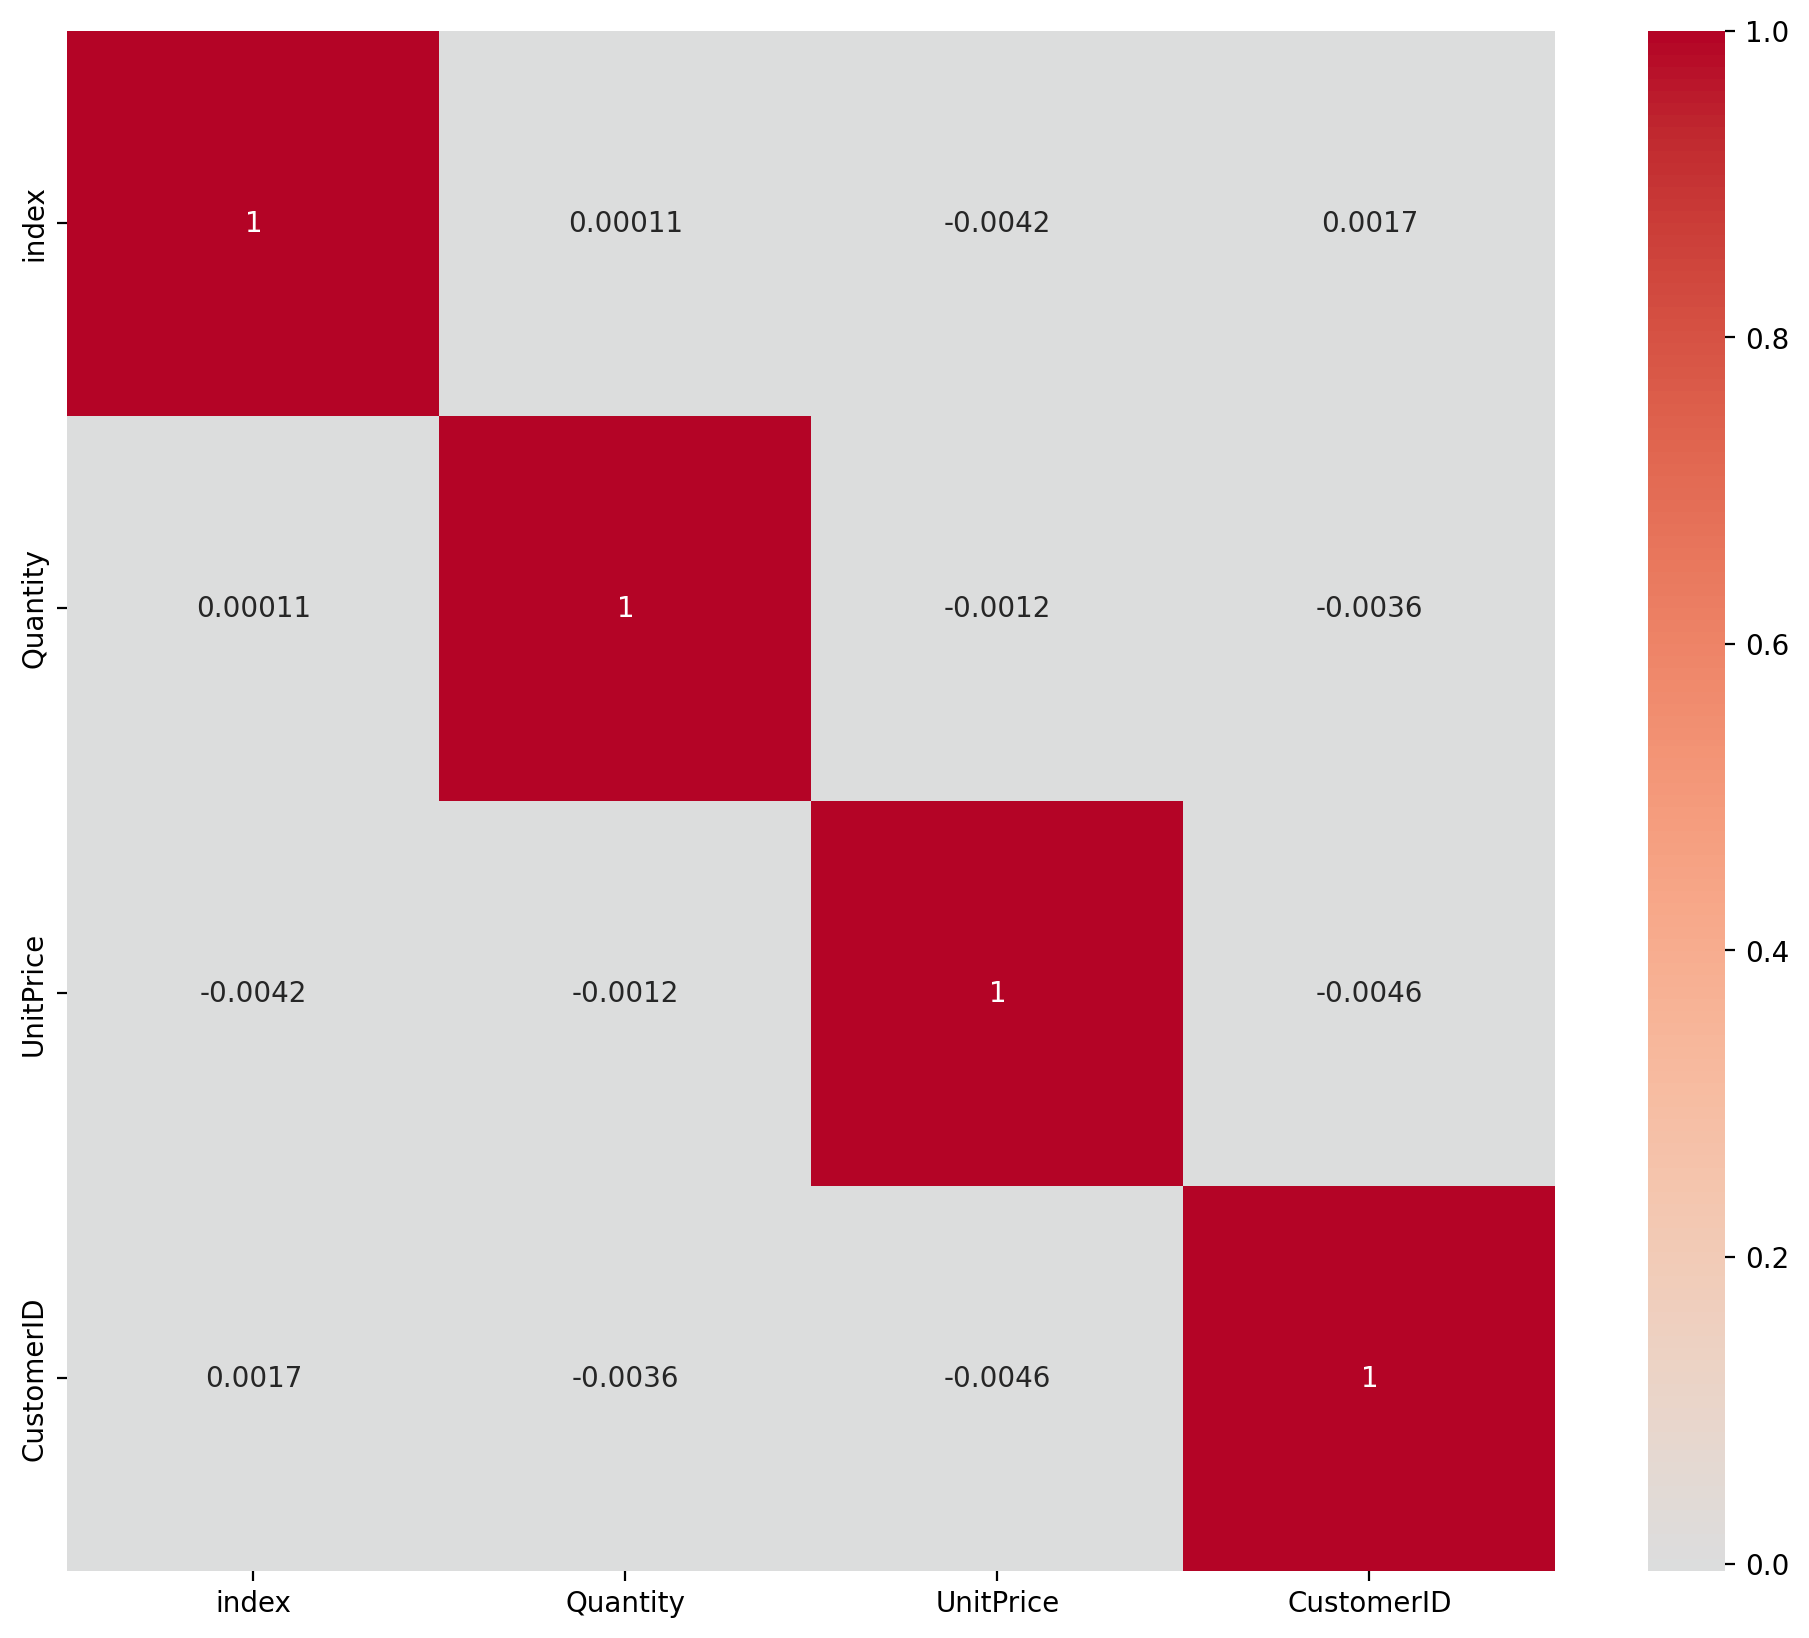

In [6]:
fig, ax = plt.subplots(figsize=(12, 10), dpi=200)

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0, ax=ax);